<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Philosophy-of-Bayesian-Inference" data-toc-modified-id="The-Philosophy-of-Bayesian-Inference-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Philosophy of Bayesian Inference</a></span><ul class="toc-item"><li><span><a href="#The-Bayesian-State-of-Mind" data-toc-modified-id="The-Bayesian-State-of-Mind-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Bayesian State of Mind</a></span></li><li><span><a href="#Bayesian-Inference-in-Practice" data-toc-modified-id="Bayesian-Inference-in-Practice-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bayesian Inference in Practice</a></span></li><li><span><a href="#Are-Frequentist-Methods-Incorrect?" data-toc-modified-id="Are-Frequentist-Methods-Incorrect?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Are Frequentist Methods Incorrect?</a></span></li><li><span><a href="#Our-Bayesian-framework" data-toc-modified-id="Our-Bayesian-framework-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Our Bayesian framework</a></span></li><li><span><a href="#Probability-Distributions" data-toc-modified-id="Probability-Distributions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Probability Distributions</a></span><ul class="toc-item"><li><span><a href="#Discrete-Case" data-toc-modified-id="Discrete-Case-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Discrete Case</a></span><ul class="toc-item"><li><span><a href="#Poisson-Distribution" data-toc-modified-id="Poisson-Distribution-1.5.1.1"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Poisson Distribution</a></span></li></ul></li><li><span><a href="#Continuous-Case" data-toc-modified-id="Continuous-Case-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Continuous Case</a></span></li><li><span><a href="#But-what-is-$\lambda-\;$?" data-toc-modified-id="But-what-is-$\lambda-\;$?-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>But what is $\lambda \;$?</a></span></li></ul></li><li><span><a href="#Introducing-our-first-hammer:-PyMC3" data-toc-modified-id="Introducing-our-first-hammer:-PyMC3-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Introducing our first hammer: PyMC3</a></span><ul class="toc-item"><li><span><a href="#Why-would-I-want-samples-from-the-posterior,-anyways?" data-toc-modified-id="Why-would-I-want-samples-from-the-posterior,-anyways?-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Why would I want samples from the posterior, anyways?</a></span></li></ul></li><li><span><a href="#Determining-Statistically-if-the-Two-$\lambda$s-Are-Indeed-Different?" data-toc-modified-id="Determining-Statistically-if-the-Two-$\lambda$s-Are-Indeed-Different?-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Determining Statistically if the Two $\lambda$s Are Indeed Different?</a></span></li></ul></li></ul></div>

[Original content created by Cam Davidson-Pilon](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

# The Philosophy of Bayesian Inference

## The Bayesian State of Mind
- Bayesian inference differs from more traditional statistical inference by preserving **uncertainty**. Isn't statistics all about deriving certainty from randomness?

- The Bayesian worldview interprets probability as a measure of **believability** in an event--that is, how confident we are in an event occuring. 

- **Frequentists**, who ascribe to the more classical version of statistics, assume that probability is the long-run frequency of events (hence the name). 

- **Bayesians**, on the other hand, have a more intuitive approach. Bayesians interpret a probability as the measure of belief, or confidence, in an event occuring. Simply, a probability is a summary of an opinion. 


- **Prior probability** denotes our belief about event $A$ as $P(A)$
- **Posterior probability** denotes our updated belief after seeing the evidence, i.e the probability of $A$ given the evidence $X$ $P(A|X)$

## Bayesian Inference in Practice

If frequentist and Bayesian inference were programming functions, with inputs being statistical problems, then the two would be different in what they return to the user. The frequentist inference function would return a number, representing an estimate (typically a summary statistic like the sample average etc.), whereas the Bayesian function would return probabilities.

For example, in our debugging problem above, calling the frequentist function with the argument "My code passed all X
tests; is my code bug-free?" would return a YES. On the other hand, asking our Bayesian function "Often my code has bugs. My code passed all X

tests; is my code bug-free?" would return something very different: probabilities of YES and NO. The function might return:

>YES, with probability 0.8; NO, with probability 0.2

This is very different from the answer the frequentist function returned. Notice that the Bayesian function accepted an additional argument: "Often my code has bugs". This parameter is the prior. By including the prior parameter, we are telling the Bayesian function to include our belief about the situation. Technically this parameter in the Bayesian function is optional, but we will see excluding it has its own consequences.

## Are Frequentist Methods Incorrect?

No. Frequentist methods are still useful or state-of-the-art in many areas. Tools such as least squares linear regression, LASSO regression, and expectation- maximization algorithms are all powerful and fast. Bayesian methods complement these techniques by solving problems that these approaches cannot, or by illuminating the underlying system with more flexible modeling.

## Our Bayesian framework
 
We are interested in beliefs, which can be interpreted as probabilities by thinking Bayesian. We have a *prior* belief in event $A$, beliefs formed by previous information, e.g., our prior belief about bugs being in our code before performing tests.

Secondly, we observe our evidence. To continue our buggy-code example: if our code passes $X$ tests, we want to update our belief to incorporate this. We call this new belief the *posterior* probability. Updating our belief is done via the following equation, known as Bayes' Theorem, after its discoverer Thomas Bayes:
$ 
\begin{align}
 P( A | X ) = & \frac{ P(X | A) P(A) } {P(X) } \\\\[5pt]
& \propto P(X | A) P(A)\;\; (\propto \text{is proportional to } )
\end{align}
$
The above formula is not unique to Bayesian inference: it is a mathematical fact with uses outside Bayesian inference. Bayesian inference merely uses it to connect prior probabilities $P(A)$ with an updated posterior probabilities $P(A | X )$.

##### Example: Mandatory coin-flip example
 
Suppose, naively, that you are unsure about the probability of heads in a coin flip (spoiler alert: it's 50%). You believe there is some true underlying ratio, call it $p$, but have no prior opinion on what $p$ might be. 
 
 We begin to flip a coin, and record the observations: either $H$ or $T$. This is our observed data. An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data. 

In [1]:
%matplotlib inline
import json
import matplotlib
# Style Customization
#s = json.load(open("styles/bmh_matplotlibrc.json"))
#matplotlib.RcParams.update(s)
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.core.pylabtools import figsize
figsize(11, 9)
import scipy.stats as stats
import numpy as np 
rs = np.random.seed(1234)

In [2]:
dist = stats.beta
dist

In [3]:
n_trials = [0, 1, 2, 3, 4, 5, 10, 20, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

In [4]:
data

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [5]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

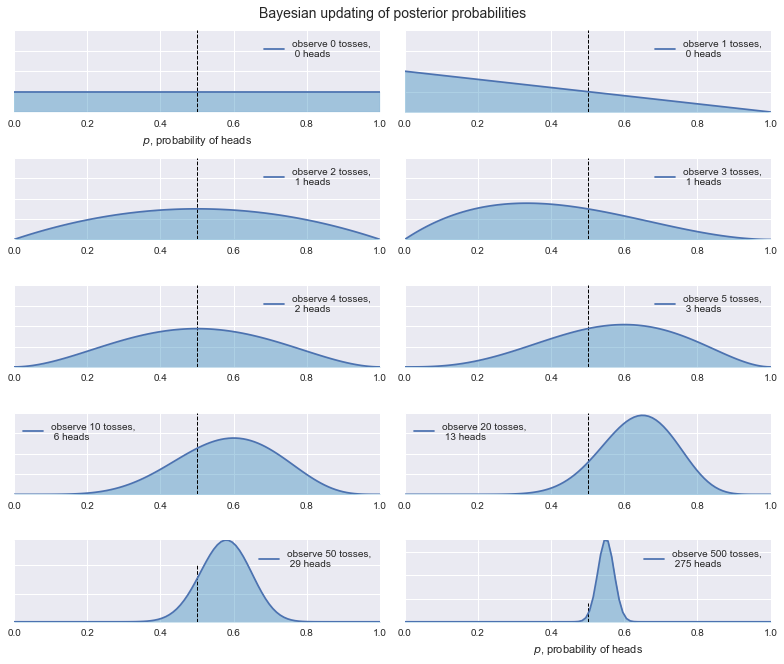

In [6]:
figsize(11, 9)
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") if k in [0, len(n_trials) - 1
                                                     ] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    # Compute Probability density function at x of the given RV.
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle(
    "Bayesian updating of posterior probabilities", y=1.02, fontsize=14)

plt.tight_layout()

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line). 

Notice that the plots are not always *peaked* at 0.5. There is no reason it should be: recall we assumed we did not have a prior opinion of what $p$ is. In fact, if we observe quite extreme data, say 8 flips and only 1 observed heads, our distribution would look very biased *away* from lumping around 0.5 (with no prior opinion, how confident would you feel betting on a fair coin after observing 8 tails and 1 head). As more data accumulates, we would see more and more probability being assigned at $p=0.5$, though never all of it.

##### Example: Bug, or just sweet, unintended feature?

 
Let $A$ denote the event that our code has **no bugs** in it. Let $X$ denote the event that the code passes all debugging tests. For now, we will leave the prior probability of no bugs as a variable, i.e. $P(A) = p$. 

We are interested in $P(A|X)$, i.e. the probability of no bugs, given our debugging tests $X$ pass. To use the formula above, we need to compute some quantities.
 
What is $P(X | A)$, i.e., the probability that the code passes $X$ tests *given* there are no bugs? Well, it is equal to 1, for code with no bugs will pass all tests. 

$P(X)$ is a little bit trickier: The event $X$ can be divided into two possibilities, event $X$ occurring even though our code *indeed has* bugs (denoted $\sim A\;$, spoken *not $A$*), or event $X$ without bugs ($A$). $P(X)$ can be represented as:

\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \\\\[5pt]
  & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
 & = P(X|A)p + P(X | \sim A)(1-p)
 \end{align}

We have already computed $P(X|A)$ above. On the other hand, $P(X | \sim A)$ is subjective: our code can pass tests but still have a bug in it, though the probability there is a bug present is reduced. Note this is dependent on the number of tests performed, the degree of complication in the tests, etc. Let's be conservative and assign $P(X|\sim A) = 0.5$. Then
 
\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{ 2 p}{1+p}
\end{align}

This is the posterior probability. What does it look like as a function of our prior, $p \in [0,1]$? 

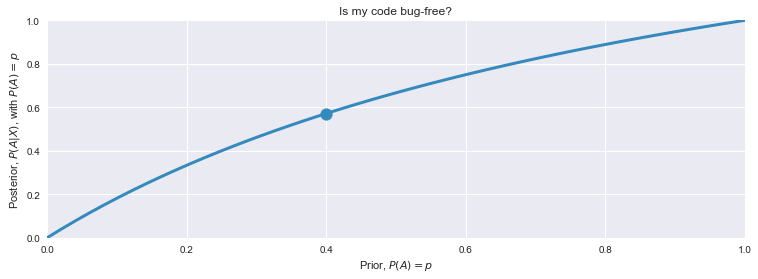

In [7]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.4, 2 * (0.4) / 1.4, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")
plt.show()

We can see the biggest gains if we observe the $X$ tests passed when the prior probability, $p$, is low. Let's settle on a specific value for the prior. If a programmer gives themselves a realistic prior of 0.40, that is, there is a 20% chance that they write code bug-free. To be more realistic, this prior should be a function of how complicated and large the code is, but let's pin it at 0.40. Then the updated belief that theit code is bug-free is 0.57. 
 
Recall that the prior is a probability: $p$ is the prior probability that there *are no bugs*, so $1-p$ is the prior probability that there *are bugs*.
 
Similarly, our posterior is also a probability, with $P(A | X)$ the probability there is no bug *given we saw all tests pass*, hence $1-P(A|X)$ is the probability there is a bug *given all tests passed*. What does our posterior probability look like? Below is a chart of both the prior and the posterior probabilities. 
 

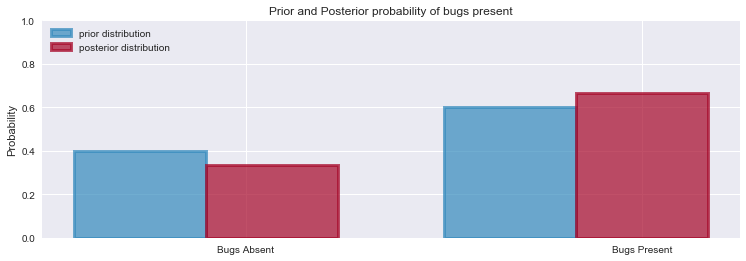

In [8]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.40, 0.60]
posterior = [1. / 3, 2. / 3]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])

plt.bar([0 + 0.25, .7 + 0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="posterior distribution",
        lw="3", edgecolor=colours[1])

plt.ylim(0,1)
plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])
plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left");

Notice that after we observed $X$ occur, the probability of bugs being absent increased. By increasing the number of tests, we can approach confidence (probability 1) that there are no bugs present.

## Probability Distributions

Let $Z$ be some random variable. Then associated with $Z$ is a probability distribution function that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve. 

We can divide random variables into three classifications:

-   **$Z$ is discrete**: Discrete random variables may only assume values on a specified list. Things like populations, movie ratings, and number of votes are all discrete random variables. Discrete random variables become more clear when we contrast them with...
 
-   **$Z$ is continuous**: Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.

- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 

##### Expected Value
Expected value (EV) is one of the most important concepts in probability. The EV for a given probability distribution can be described as "the mean value in the long run for many repeated samples from that distribution." To borrow a metaphor from physics, a distribution's EV acts like its "center of mass." Imagine repeating the same experiment many times over, and taking the average over each outcome. The more you repeat the experiment, the closer this average will become to the distributions EV. (side note: as the number of repeated experiments goes to infinity, the difference between the average outcome and the EV becomes arbitrarily small.)

### Discrete Case

- if $Z$ is discrete, then its distribution is called a *probability mass function* which measures the probability $Z$ takes on the value $k$, $P(Z=k)$.

- The probability mass function completely describes the random variable $Z$, i.e, if we know the mass function, we know how $Z$ should behave. 

#### Poisson Distribution

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots, \; \; \lambda \in \mathbb{R}_{>0} $$
 
$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 
 
Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 
 
If a random variable $Z$ has a Poisson mass distribution, we denote this by writing
 
$$Z \sim \text{Poi}(\lambda) $$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.: 
$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$
 

Below, we plot the probability mass distribution for different $\lambda$ values. The first thing to notice is that by increasing $\lambda$, we add more probability of larger values occurring. Second, notice that although the graph ends at 15, the distributions do not. They assign positive probability to every non-negative integer.

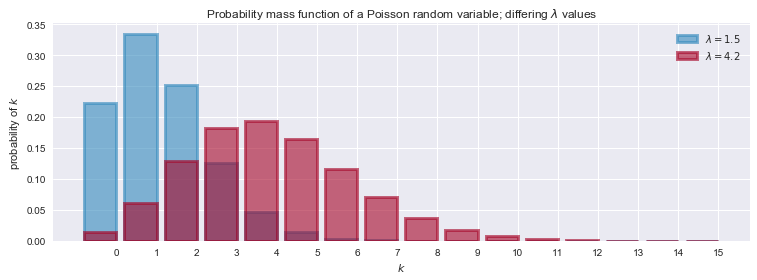

In [9]:
figsize(12.5, 4)
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(
    a,
    poi.pmf(a, lambda_[0]),
    color=colours[0],
    label="$\lambda = %.1f$" % lambda_[0],
    alpha=0.60,
    edgecolor=colours[0],
    lw="3")

plt.bar(
    a,
    poi.pmf(a, lambda_[1]),
    color=colours[1],
    label="$\lambda = %.1f$" % lambda_[1],
    alpha=0.60,
    edgecolor=colours[1],
    lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")
plt.show()

### Continuous Case

Instead of a probability mass function, a continuous random variable has a *probability density function*. This might seem like unnecessary nomenclature, but the density function and the mass function are very different creatures. An example of continuous random variable is a random variable with *exponential density*. The density function for an exponential random variable looks like this:
 
$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data (measured in Kelvins, of course), or any other precise *and positive* variable. The graph below shows two probability density functions with different $\lambda$ values. 
 
When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write
 
$$Z \sim \text{Exp}(\lambda)$$
 
Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

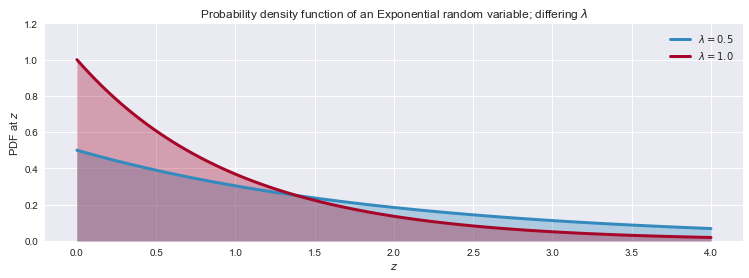

In [10]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(
        a,
        expo.pdf(a, scale=1. / l),
        lw=3,
        color=c,
        label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$")
plt.show()

### But what is $\lambda \;$?

**This question is what motivates statistics**. In the real world, $\lambda$ is hidden from us. We see only $Z$, and must go backwards to try and determine $\lambda$. The problem is difficult because there is no one-to-one mapping from $Z$ to $\lambda$. Many different methods have been created to solve the problem of estimating $\lambda$, but since $\lambda$ is never actually observed, no one can say for certain which method is best! 

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.
 
This might seem odd at first. After all, $\lambda$ is fixed; it is not (necessarily) random! How can we assign probabilities to values of a non-random variable? Ah, we have fallen for our old, frequentist way of thinking. Recall that under Bayesian philosophy, we *can* assign probabilities if we interpret them as beliefs. And it is entirely acceptable to have *beliefs* about the parameter $\lambda$. 


##### Example: Inferring behaviour from text-message data

Let's try to model a more interesting example, one that concerns the rate at which a user sends and receives text messages:

>  You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this?



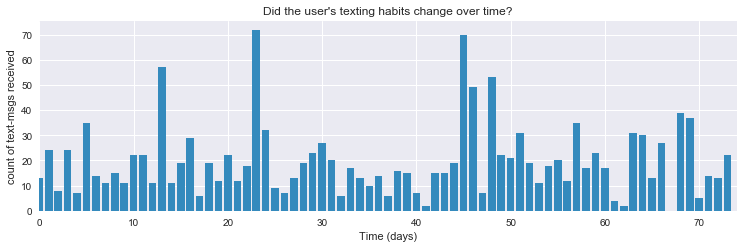

In [11]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

Before we start modeling, see what you can figure out just by looking at the chart above. Would you say there was a change in behaviour during this time period? 

How can we start to model this? Well, as we have conveniently already seen, a Poisson random variable is a very appropriate model for this type of *count* data. Denoting day $i$'s text-message count by $C_i$, 

$$ C_i \sim \text{Poisson}(\lambda)  $$
 
We are not sure what the value of the $\lambda$ parameter really is, however. Looking at the chart above, it appears that the rate might become higher late in the observation period, which is equivalent to saying that $\lambda$ increases at some point during the observations. (Recall that a higher value of $\lambda$ assigns more probability to larger outcomes. That is, there is a higher probability of many text messages having been sent on a given day.)

How can we represent this observation mathematically? Let's assume that on some day during the observation period (call it $\tau$), the parameter $\lambda$ suddenly jumps to a higher value. So we really have two $\lambda$ parameters: one for the period before $\tau$, and one for the rest of the observation period. In the literature, a sudden transition like this would be called a *switchpoint*:

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$
 
If, in reality, no sudden change occurred and indeed $\lambda_1 = \lambda_2$, then the $\lambda$s posterior distributions should look about equal.

We are interested in inferring the unknown $\lambda$s. To use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. What would be good prior probability distributions for $\lambda_1$ and $\lambda_2$? Recall that $\lambda$ can be any positive number. As we saw earlier, the *exponential* distribution provides a continuous density function for positive numbers, so it might be a good choice for modeling $\lambda_i$. But recall that the exponential distribution takes a parameter of its own, so we'll need to include that parameter in our model. Let's call that parameter $\alpha$.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$ is called a *hyper-parameter* or *parent variable*. In literal terms, it is a parameter that influences other parameters. Our initial guess at $\alpha$ does not influence the model too strongly, so we have some flexibility in our choice.  A good rule of thumb is to set the exponential parameter equal to the inverse of the average of the count data. Since we're modeling $\lambda$ using an exponential distribution, we can use the expected value identity shown earlier to get:

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

An alternative, and something I encourage the reader to try, would be to have two priors: one for each $\lambda_i$. Creating two exponential distributions with different $\alpha$ values reflects our prior belief that the rate changed at some point during the observations.

What about $\tau$? Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a *uniform prior belief* to every possible day. This is equivalent to saying

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}

So after all this, what does our overall prior distribution for the unknown variables look like? Frankly, *it doesn't matter*. What we should understand is that it's an ugly, complicated mess involving symbols only a mathematician could love. And things will only get uglier the more complicated our models become. Regardless, all we really care about is the posterior distribution.

We next turn to PyMC, a Python library for performing Bayesian analysis that is undaunted by the mathematical monster we have created. 

## Introducing our first hammer: PyMC3

PyMC3 code is easy to read. The only novel thing should be the syntax, and I will interrupt the code to explain individual sections. Simply remember that we are representing the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables:


In [12]:
import pymc3 as pm 
import theano.tensor as TT

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Anderson Banihirwe\AppData\Local\conda\conda\envs\devel\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
count_data

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

In [14]:
with pm.Model() as model:
    alpha = 1.0 / count_data.mean()  # Recall count_data is the
    # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)


In the code above, we create the PyMC variables corresponding to $\lambda_1$ and $\lambda_2$. We assign them to PyMC's *stochastic variables*, so-called because they are treated by the back end as random number generators. We can demonstrate this fact by calling their built-in `random()` methods.


In [15]:
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 45 29 71


In [16]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = TT.switch(tau >= idx, lambda_1, lambda_2)

This code creates a new function `lambda_`, but really we can think of it as a random variable: the random variable $\lambda$ from above. The `switch()` function assigns `lambda_1` or `lambda_2` as the value of `lambda_`, depending on what side of `tau` we are on. The values of `lambda_` up until `tau` are `lambda_1` and the values afterwards are `lambda_2`.

Note that because `lambda_1`, `lambda_2` and `tau` are random, `lambda_` will be random. We are **not** fixing any variables yet.

In [17]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

The variable `observation` combines our data, `count_data`, with our proposed data-generation scheme, given by the variable `lambda_`, through the `observed` keyword. 

The code below will be explained in Chapter 3, but I show it here so you can see where our results come from. One can think of it as a *learning* step. The machinery being employed is called *Markov Chain Monte Carlo* (MCMC), which I also delay explaining until Chapter 3. This technique returns thousands of random variables from the posterior distributions of $\lambda_1, \lambda_2$ and $\tau$. We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called *traces* in the MCMC literature) into histograms.

In [18]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2_log__]
>Metropolis: [lambda_1_log__]
The number of effective samples is smaller than 25% for some parameters.


In [19]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

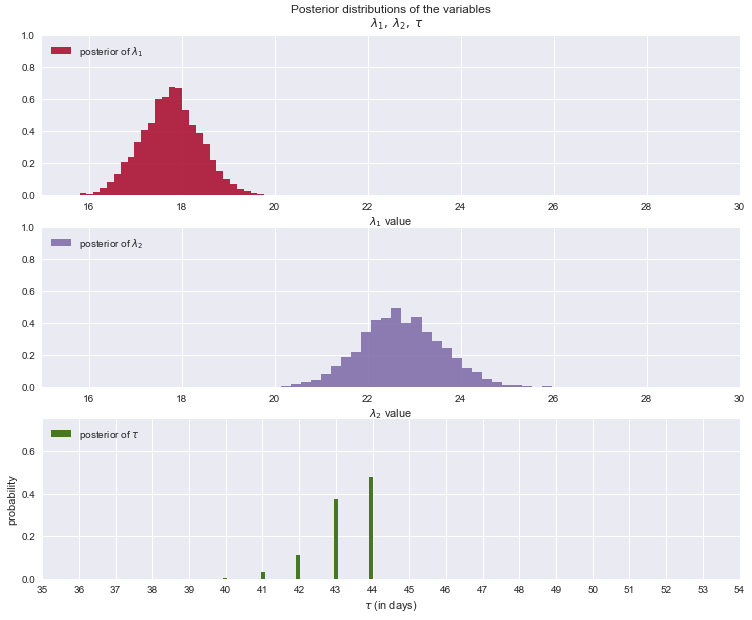

In [20]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(
    lambda_1_samples,
    histtype='stepfilled',
    bins=30,
    alpha=0.85,
    label="posterior of $\lambda_1$",
    color="#A60628",
    normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(
    lambda_2_samples,
    histtype='stepfilled',
    bins=30,
    alpha=0.85,
    label="posterior of $\lambda_2$",
    color="#7A68A6",
    normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(
    tau_samples,
    bins=n_count_data,
    alpha=1,
    label=r"posterior of $\tau$",
    color="#467821",
    weights=w,
    rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

Recall that Bayesian methodology returns a *distribution*. Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. What have we gained? Immediately, we can see the uncertainty in our estimates: the wider the distribution, the less certain our posterior belief should be. We can also see what the plausible values for the parameters are: $\lambda_1$ is around 18 and $\lambda_2$ is around 23. The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's text-message behaviour.

What other observations can you make? If you look at the original data again, do these results seem reasonable? 

Notice also that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. In fact, the posterior distributions are not really of any form that we recognize from the original model. But that's OK! This is one of the benefits of taking a computational point of view. If we had instead done this analysis using mathematical approaches, we would have been stuck with an analytically intractable (and messy) distribution. Our use of a computational approach makes us indifferent to mathematical tractability.


Our analysis also returned a distribution for $\tau$. Its posterior distribution looks a little different from the other two because it is a discrete random variable, so it doesn't assign probabilities to intervals. We can see that near day 45, there was a 50% chance that the user's behaviour changed. Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. By contrast, in the actual results we see that only three or four days make any sense as potential transition points. 

### Why would I want samples from the posterior, anyways?

We will deal with this question for the remainder of the book, and it is an understatement to say that it will lead us to some amazing results. For now, let's end this chapter with one more example.

We'll use the posterior samples to answer the following question: what is the expected number of texts at day $t, \; 0 \le t \le 70$ ? Recall that the expected value of a Poisson variable is equal to its parameter $\lambda$. Therefore, the question is equivalent to *what is the expected value of $\lambda$ at time $t$*?

In the code below, let $i$ index samples from the posterior distributions. Given a day $t$, we average over all possible $\lambda_i$ for that day $t$, using $\lambda_i = \lambda_{1,i}$ if $t \lt \tau_i$ (that is, if the behaviour change has not yet occurred), else we use $\lambda_i = \lambda_{2,i}$. 

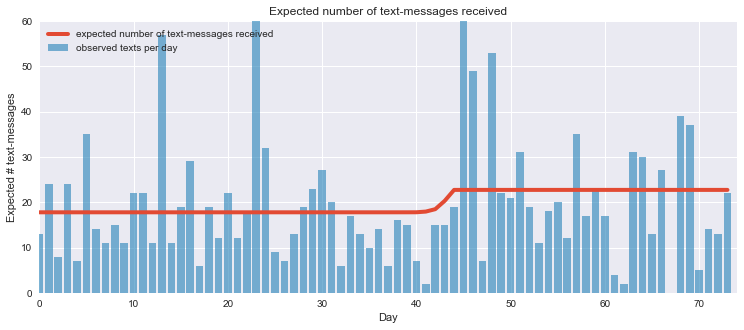

In [21]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (
        lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N

plt.plot(
    range(n_count_data),
    expected_texts_per_day,
    lw=4,
    color="#E24A33",
    label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(
    np.arange(len(count_data)),
    count_data,
    color="#348ABD",
    alpha=0.65,
    label="observed texts per day")

plt.legend(loc="upper left");

Our analysis shows strong support for believing the user's behavior did change ($\lambda_1$ would have been close in value to $\lambda_2$ had this not been true), and that the change was sudden rather than gradual (as demonstrated by $\tau$'s strongly peaked posterior distribution). We can speculate what might have caused this: a cheaper text-message rate, a recent weather-to-text subscription, or perhaps a new relationship. 

In [22]:
print(expected_texts_per_day)

[17.76915874 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874
 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874
 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874
 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874
 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874
 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874 17.76915874
 17.76915874 17.76929695 17.77040006 17.77228256 17.77852684 17.92903374
 18.46020732 20.29290296 22.71657445 22.71657445 22.71657445 22.71657445
 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445
 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445
 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445
 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445 22.71657445
 22.71657445 22.71657445]


##### Exercises


 1\.  Using `lambda_1_samples` and `lambda_2_samples`, what is the mean of the posterior distributions of $\lambda_1$ and $\lambda_2$?

To compute the mean of the posteriors (which is the same as the expected value of the posteriors), we just need the samples and a .mean function.

In [23]:
lambda_1_samples.mean()

17.76915873626346

In [24]:
lambda_2_samples.mean()

22.716574445528533

 2\.  What is the expected percentage increase in text-message rates? `hint:` compute the mean of `lambda_1_samples/lambda_2_samples`. Note that this quantity is very different from `lambda_1_samples.mean()/lambda_2_samples.mean()`.

In [25]:
relative_increase_samples = (
    lambda_2_samples - lambda_1_samples) / lambda_1_samples

In [26]:
print("The expected percentage increase in text-message rates was {}".
      format(relative_increase_samples*100))

The expected percentage increase in text-message rates was [22.38028504 22.38028504 29.60339271 ... 35.79487537 35.79487537
 35.79487537]


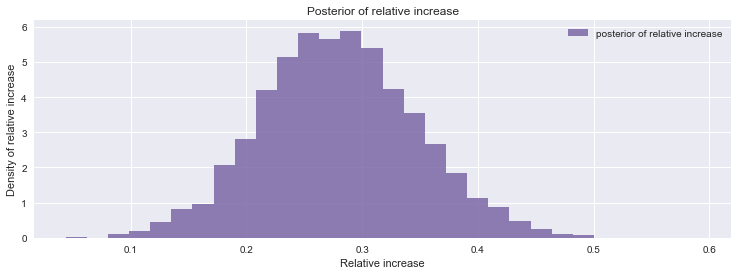

In [27]:
figsize(12.5, 4)
plt.hist(
    relative_increase_samples,
    histtype='stepfilled',
    bins=30,
    alpha=0.85,
    color="#7A68A6",
    normed=True,
    label='posterior of relative increase')
plt.xlabel("Relative increase")
plt.ylabel("Density of relative increase")
plt.title("Posterior of relative increase")
plt.legend();

In [28]:
print(relative_increase_samples.mean() * 100)

28.001507366601903


3\. What is the mean of $\lambda_1$ **given** that we know $\tau$ is less than 45.  That is, suppose we have been given new information that the change in behaviour occurred prior to day 45. What is the expected value of $\lambda_1$ now? (You do not need to redo the PyMC3 part. Just consider all instances where `tau_samples < 45`.)


If we know $\tau < 45$, then all samples need to be conditioned on that:

In [29]:
ix = tau_samples < 45
print(lambda_1_samples[ix].mean())

17.76915873626346


## Determining Statistically if the Two $\lambda$s Are Indeed Different?

In the text-messaging example, we visually inspected the posteriors of $\lambda_1$ and $\lambda_2$ to declare them different. This was fair, as the general locations of the posteriors were very far apart. What if this were not true? What if the distributions partially overlapped? How can we make this decision more formal?


One way is to compute $P(\lambda_1 < \lambda_2 | data)$; that is, what is the probability thatthe true value of $\lambda_1$ is smaller than $\lambda_2$, given the data we observed? If this number is close to $50\%$, no better than flipping a coin, then we can’t be certain they are indeed different. If this number is close to $100\%$, then we can be very confident that the two true values are very different. Using samples from the posteriors, this computation is very simple—we compute the fraction of times that a sample from the posterior of $\lambda_1$ is less than one from $\lambda_2$:

In [30]:
print(lambda_1_samples < lambda_2_samples)

[ True  True  True ...  True  True  True]


In [31]:
# How often does this happen?
(lambda_1_samples <  lambda_2_samples).sum()

20000

In [32]:
# How many samples are there?
lambda_1_samples.shape[0]

20000

In [33]:
# The ratio is the probability. Or, we can just use .mean: 
(lambda_1_samples < lambda_2_samples).mean()

1.0

So, there is virtually a $100\%$ chance, and we can be very confident the two
values are different. We can ask more complicated things, too, like “What is the probability that the values differ by at least 1? 2? 5? 10?”

In [34]:
# The vector abs(lambda_1_samples - lambda_2_samples) > 1 is a boolean, # True if the values are more than 1 apart, False otherwise. # How often does this happen? Use .mean()
for d in [1, 2, 5, 10]:
    v = (abs(lambda_1_samples - lambda_2_samples) >= d).mean()
    print("What is the probability the difference is larger than %d ? %.2f" %
          (d, v))

What is the probability the difference is larger than 1 ? 1.00
What is the probability the difference is larger than 2 ? 1.00
What is the probability the difference is larger than 5 ? 0.48
What is the probability the difference is larger than 10 ? 0.00


In [35]:
%load_ext version_information
%version_information pymc3, matplotlib, theano, numpy, scipy

Software versions
Python 3.6.4 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.2.1
OS Windows 10 10.0.16299 SP0
pymc3 3.3
matplotlib 2.1.2
theano 1.0.1
numpy 1.14.0
scipy 1.0.0
Fri Feb 16 15:40:53 2018 Central Standard Time